# Sergio Guerra Part 2

## Reading Super Covid Dataframe

In [1]:
# Import modules and read super covid dataframe.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covid_data = pd.read_csv("./super_covid_data.csv")

covid_data_df = pd.DataFrame(covid_data)

covid_data_df.head()

,countyFIPS,County Name_x,State_x,StateFIPS_x,2020-01-22_x,2020-01-23_x,2020-01-24_x,2020-01-25_x,2020-01-26_x,2020-01-27_x,...,2023-07-17_y,2023-07-18_y,2023-07-19_y,2023-07-20_y,2023-07-21_y,2023-07-22_y,2023-07-23_y,County Name,State,population
0,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,Autauga County,AL,55869
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,Baldwin County,AL,223234
2,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,Barbour County,AL,24686
3,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,Bibb County,AL,22394
4,1009,Blount County,AL,1,0,0,0,0,0,0,...,261,261,261,261,261,261,261,Blount County,AL,57826


## Calculating Populations

In [2]:
# Calculate populations by selecting the states in the dataframe and summing the population columns

nc_population = covid_data_df[covid_data_df['State'] == 'NC']
nc_population = nc_population['population'].sum()

ga_population = covid_data_df[covid_data_df['State'] == 'GA']
ga_population = ga_population['population'].sum()

nv_population = covid_data_df[covid_data_df['State'] == 'NV']
nv_population = nv_population['population'].sum()

wa_population = covid_data_df[covid_data_df['State'] == 'WA']
wa_population = wa_population['population'].sum()

mn_population = covid_data_df[covid_data_df['State'] == 'MN']
mn_population = mn_population['population'].sum()

tn_population = covid_data_df[covid_data_df['State'] == 'TN']
tn_population = tn_population['population'].sum()

print("Populations:")
print(ga_population)
print(nv_population)
print(wa_population)
print(mn_population)
print(tn_population)

Populations:
10617423
3080156
7614893
5639632
6829174


## Specifying Dates and Creating NC DataFrame

In [3]:
start_date = '2020-07-06'
end_date = '2020-12-28'

# Date columns are chosen by being greater than start date and less than end date
date_columns = covid_data_df.columns[(covid_data_df.columns >= start_date) & (covid_data_df.columns <= end_date)]

columns = ['countyFIPS', 'County Name_x', 'State_x', 'StateFIPS_x', 'County Name_y', 'State_y', 'StateFIPS_y', 'County Name', 'State', 'population'] + date_columns.tolist()

covid_data_df = covid_data_df[columns]

# NC dataframe was created from supercovid df
nc_df = covid_data_df[covid_data_df['State_x'] == 'NC']

nc_df

,countyFIPS,County Name_x,State_x,StateFIPS_x,County Name_y,State_y,StateFIPS_y,County Name,State,population,...,2020-12-18_y,2020-12-19_y,2020-12-20_y,2020-12-21_y,2020-12-22_y,2020-12-23_y,2020-12-24_y,2020-12-25_y,2020-12-26_y,2020-12-27_y
1890,37001,Alamance County,NC,37,Alamance County,NC,37,Alamance County,NC,169509,...,114,114,114,114,114,114,114,114,114,114
1891,37003,Alexander County,NC,37,Alexander County,NC,37,Alexander County,NC,37497,...,22,26,26,26,26,26,26,26,26,26
1892,37005,Alleghany County,NC,37,Alleghany County,NC,37,Alleghany County,NC,11137,...,2,2,2,2,2,2,2,2,2,2
1893,37007,Anson County,NC,37,Anson County,NC,37,Anson County,NC,24446,...,19,19,19,19,19,19,19,19,19,19
1894,37009,Ashe County,NC,37,Ashe County,NC,37,Ashe County,NC,27203,...,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,37191,Wayne County,NC,37,Wayne County,NC,37,Wayne County,NC,123131,...,131,131,135,135,135,135,135,135,135,135
1986,37193,Wilkes County,NC,37,Wilkes County,NC,37,Wilkes County,NC,68412,...,66,67,67,67,67,67,67,67,67,67
1987,37195,Wilson County,NC,37,Wilson County,NC,37,Wilson County,NC,81801,...,94,97,100,100,100,100,100,100,100,100
1988,37197,Yadkin County,NC,37,Yadkin County,NC,37,Yadkin County,NC,37667,...,24,24,24,24,24,24,24,24,24,24


## Specifying Cases Dates with the suffix \_x

In [4]:
# Cases are denoted with the _x
cases_dates = nc_df.columns[nc_df.columns.str.endswith('_x')]

cases_dates = cases_dates.delete([0, 1, 2])

cases_dates

Index(['2020-07-06_x', '2020-07-07_x', '2020-07-08_x', '2020-07-09_x',
       '2020-07-10_x', '2020-07-11_x', '2020-07-12_x', '2020-07-13_x',
       '2020-07-14_x', '2020-07-15_x',
       ...
       '2020-12-18_x', '2020-12-19_x', '2020-12-20_x', '2020-12-21_x',
       '2020-12-22_x', '2020-12-23_x', '2020-12-24_x', '2020-12-25_x',
       '2020-12-26_x', '2020-12-27_x'],
      dtype='object', length=175)

## Specifying Deaths Dates with the suffix \_y

In [5]:
# Deaths are denoted with the _y
deaths_dates = nc_df.columns[nc_df.columns.str.endswith('_y')]

deaths_dates = deaths_dates.delete([0, 1, 2])

deaths_dates

Index(['2020-07-06_y', '2020-07-07_y', '2020-07-08_y', '2020-07-09_y',
       '2020-07-10_y', '2020-07-11_y', '2020-07-12_y', '2020-07-13_y',
       '2020-07-14_y', '2020-07-15_y',
       ...
       '2020-12-18_y', '2020-12-19_y', '2020-12-20_y', '2020-12-21_y',
       '2020-12-22_y', '2020-12-23_y', '2020-12-24_y', '2020-12-25_y',
       '2020-12-26_y', '2020-12-27_y'],
      dtype='object', length=175)

## Calculate Weekly Statistics (Mean, Mode, Median) for NC

In [6]:
# Calculates the weekly stats (mean, mode, and median) from a dataframe and the columns specified (either
# deaths_dates or cases_dates)

def calculate_weekly_stats(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])
    
    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W'))
    

    weekly_stats = weekly_data['count'].agg(['mean', 'median'])
    

    mode_df = weekly_data['count'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.NaN)
    weekly_stats['mode'] = mode_df
    
    return weekly_stats

weekly_nc_cases_stats = calculate_weekly_stats(nc_df, cases_dates)

weekly_nc_deaths_stats = calculate_weekly_stats(nc_df, deaths_dates)

print("Weekly Cases Stats:")
print(weekly_nc_cases_stats.head())

print("\nWeekly Deaths Stats:")
print(weekly_nc_deaths_stats.head())

Weekly Cases Stats:
                   mean  median  mode
date                                 
2020-07-12   796.911429   361.5    37
2020-07-19   935.564286   430.0    39
2020-07-26  1069.162857   488.0    68
2020-08-02  1199.547143   567.5    37
2020-08-09  1312.767143   629.0    78

Weekly Deaths Stats:
                 mean  median  mode
date                               
2020-07-12  14.548571     5.0     0
2020-07-19  15.800000     6.0     0
2020-07-26  17.204286     6.0     0
2020-08-02  18.847143     8.0     2
2020-08-09  20.838571    10.0     2


## Plot Weekly Stats for NC

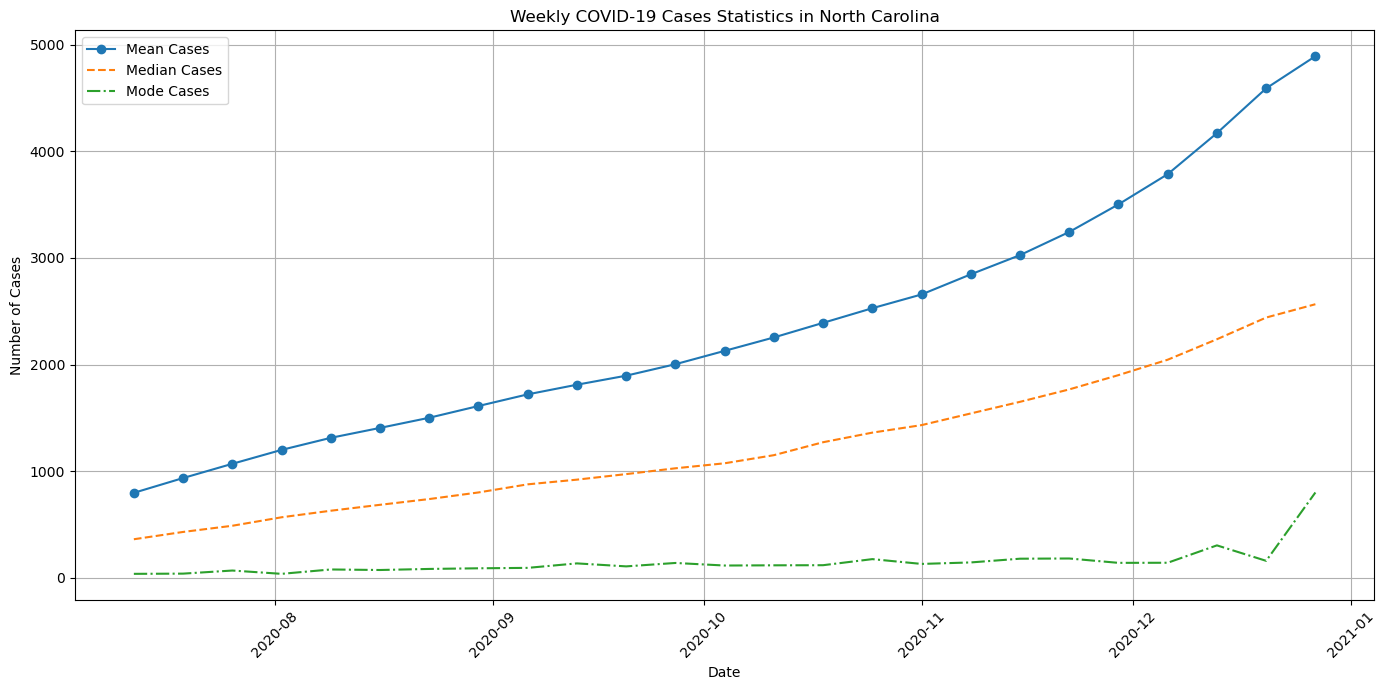

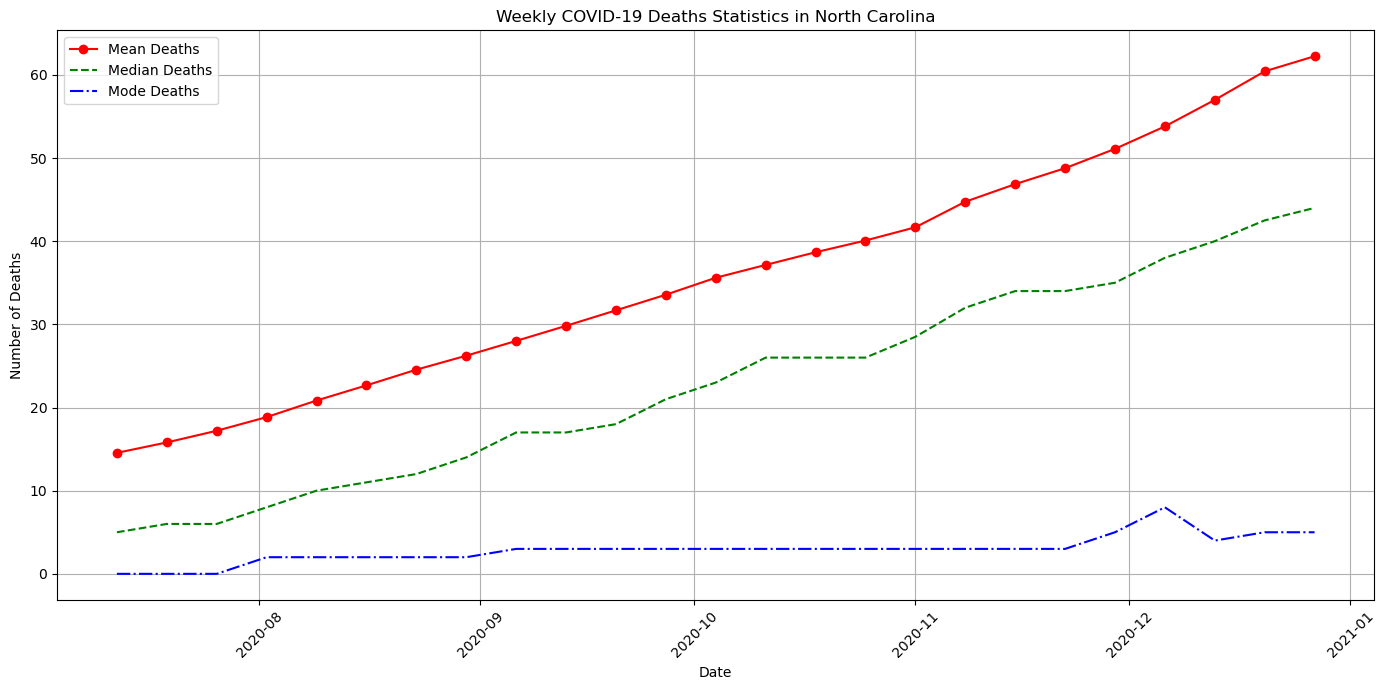

In [7]:
# Plotting both graphs
plt.figure(figsize=(14, 7))
plt.plot(weekly_nc_cases_stats.index, weekly_nc_cases_stats['mean'], label='Mean Cases', marker='o')
plt.plot(weekly_nc_cases_stats.index, weekly_nc_cases_stats['median'], label='Median Cases', linestyle='--')
plt.plot(weekly_nc_cases_stats.index, weekly_nc_cases_stats['mode'], label='Mode Cases', linestyle='-.')
plt.title('Weekly COVID-19 Cases Statistics in North Carolina')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


plt.figure(figsize=(14, 7))
plt.plot(weekly_nc_deaths_stats.index, weekly_nc_deaths_stats['mean'], label='Mean Deaths', marker='o', color='red')
plt.plot(weekly_nc_deaths_stats.index, weekly_nc_deaths_stats['median'], label='Median Deaths', linestyle='--', color='green')
plt.plot(weekly_nc_deaths_stats.index, weekly_nc_deaths_stats['mode'], label='Mode Deaths', linestyle='-.', color='blue')
plt.title('Weekly COVID-19 Deaths Statistics in North Carolina')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

## Define Function For Weekly Stats for 5 other states and plot

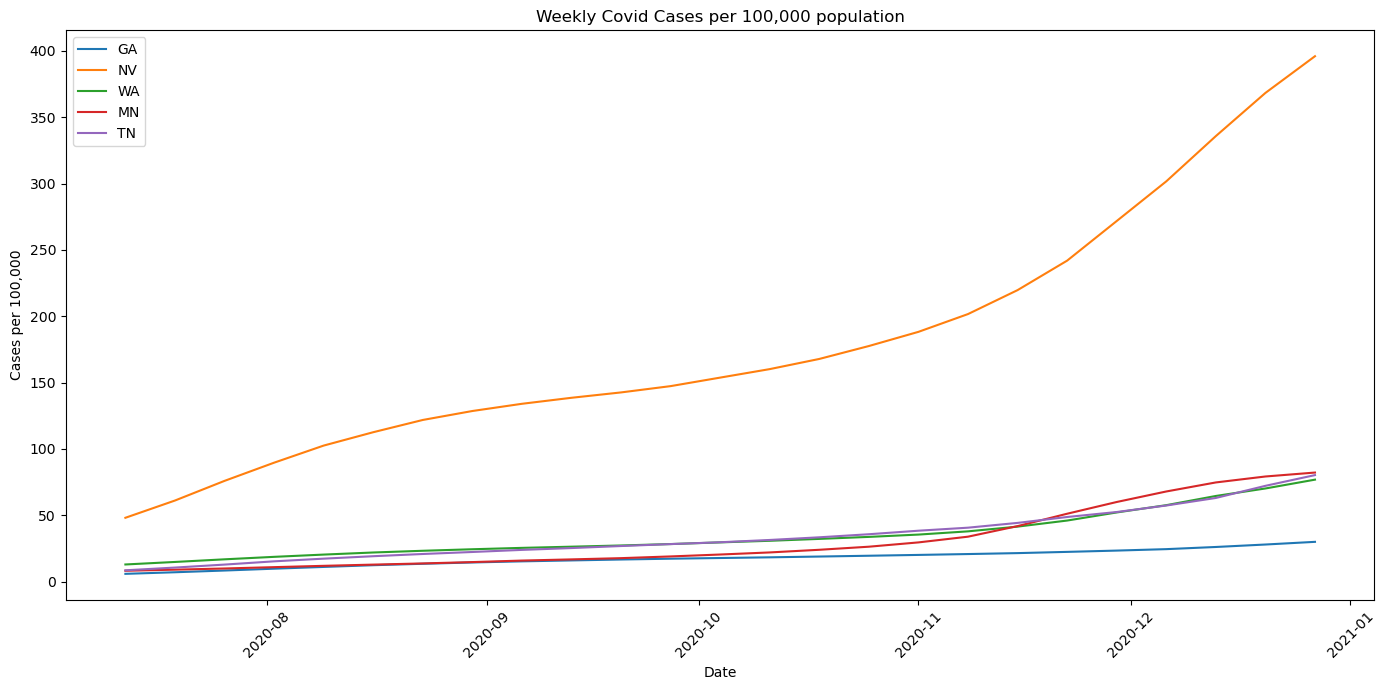

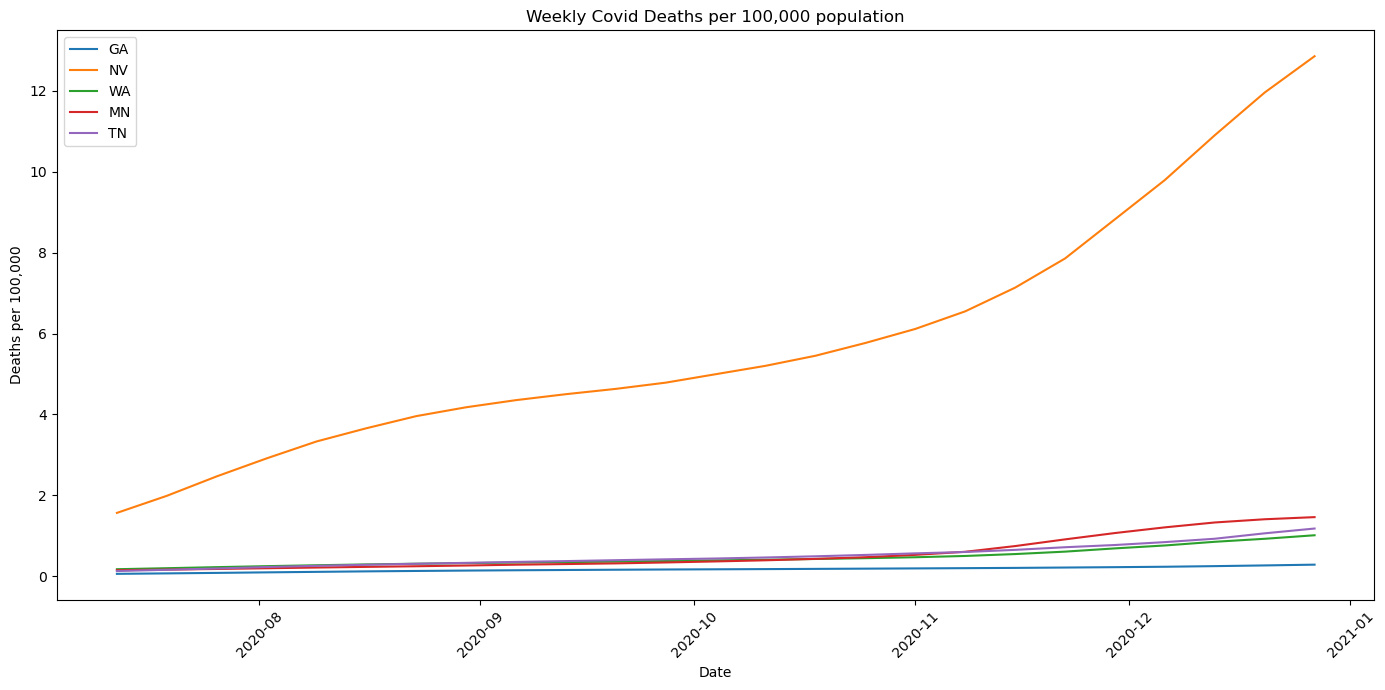

In [8]:
# Find weekly stats for the other five countries with this function
def find_weekly_stats(state, population):
    data = covid_data_df[covid_data_df['State_x'] == state]
    
    weekly_cases_stats = calculate_weekly_stats(data, cases_dates)
    weekly_deaths_stats = calculate_weekly_stats(data, deaths_dates)
    
    weekly_cases_stats[['mean', 'median']] = (weekly_cases_stats[['mean', 'median']] / population) * 100000
    
    weekly_deaths_stats[['mean', 'median']] = (weekly_cases_stats[['mean', 'median']] / population) * 100000
    
    return weekly_cases_stats['mean'], weekly_deaths_stats['mean'] 

states = ['GA', 'NV', 'WA', 'MN', 'TN']
populations = [ga_population, nv_population, wa_population, mn_population, tn_population]

plt.figure(figsize=(14, 7))

# Uses a loop to go through each state and plot it.
for idx, state in enumerate(states):
    weekly_cases_mean, weekly_deaths_mean = find_weekly_stats(state, populations[idx])
    plt.plot(weekly_cases_mean.index, weekly_cases_mean, label=state)

plt.title("Weekly Covid Cases per 100,000 population")
plt.xlabel("Date")
plt.ylabel("Cases per 100,000")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))

for idx, state in enumerate(states):
    weekly_cases_mean, weekly_deaths_mean = find_weekly_stats(state, populations[idx])
    plt.plot(weekly_deaths_mean.index, weekly_deaths_mean, label=state)

plt.title("Weekly Covid Deaths per 100,000 population")
plt.xlabel("Date")
plt.ylabel("Deaths per 100,000")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The rates in the graph differ to population differences. You can see that all the states seem to gain a moderate increase in cases and a small increase in deaths as the time moves closer to Christmas. This is most likely due to the holidays and traveling. Nevada seems to follow the US trend the most, with the rest of the states chosen lagging behind.

## Find Top Five Counties in NC for Cases and Deaths

In [9]:
nc_df_copy = nc_df.copy()

# Sum cases and deaths
nc_df_copy['total_cases'] = nc_df_copy[cases_dates].sum(axis=1)
nc_df_copy['total_deaths'] = nc_df_copy[deaths_dates].sum(axis=1)

# Sort the values to find the top five counties
top_counties_cases = nc_df_copy.sort_values(by='total_cases', ascending=False).head(5)
top_counties_deaths = nc_df_copy.sort_values(by='total_deaths', ascending=False).head(5)

print("Top 5 Counties in North Carolina by Total Cases (July 2020 - December 2020):")
print(top_counties_cases[['County Name_x', 'total_cases']])
print("\nTop 5 Counties in North Carolina by Total Deaths (July 2020 - December 2020):")
print(top_counties_deaths[['County Name_x', 'total_deaths']])

Top 5 Counties in North Carolina by Total Cases (July 2020 - December 2020):
            County Name_x  total_cases
1949  Mecklenburg County       5498036
1981         Wake County       3414943
1930     Guilford County       1815558
1923      Forsyth County       1507670
1921       Durham County       1462670

Top 5 Counties in North Carolina by Total Deaths (July 2020 - December 2020):
            County Name_x  total_deaths
1949  Mecklenburg County          59348
1981         Wake County          39563
1930     Guilford County          33684
1923      Forsyth County          18302
1925       Gaston County          17699


## Create DF for Counties and Plot Weekly Cases and Deaths

In [10]:
# Create dataframes for each of the counties above
mecklenburg_df = nc_df[nc_df['County Name'] == 'Mecklenburg County']
wake_df = nc_df[nc_df['County Name'] == 'Wake County']
guilford_df = nc_df[nc_df['County Name'] == 'Guilford County']
forsyth_df = nc_df[nc_df['County Name'] == 'Forsyth County']
durham_df = nc_df[nc_df['County Name'] == 'Durham County']
gaston_df = nc_df[nc_df['County Name'] == 'Gaston County']

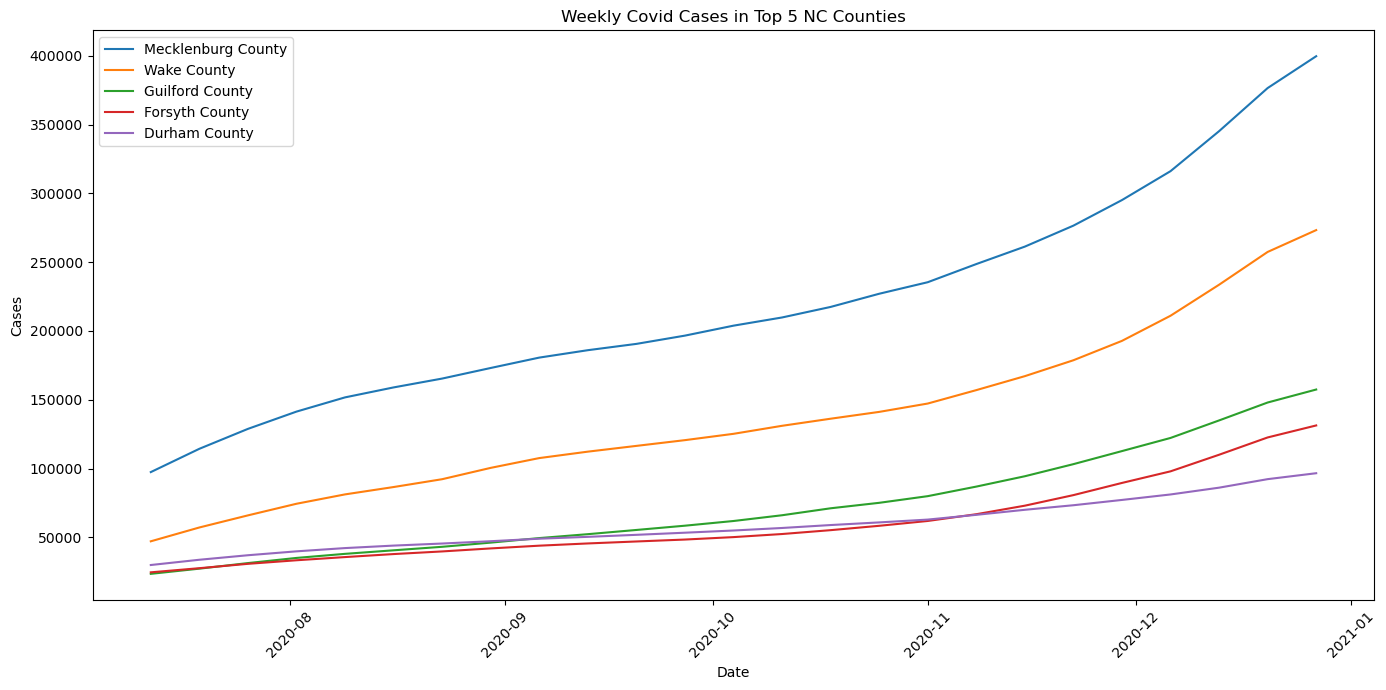

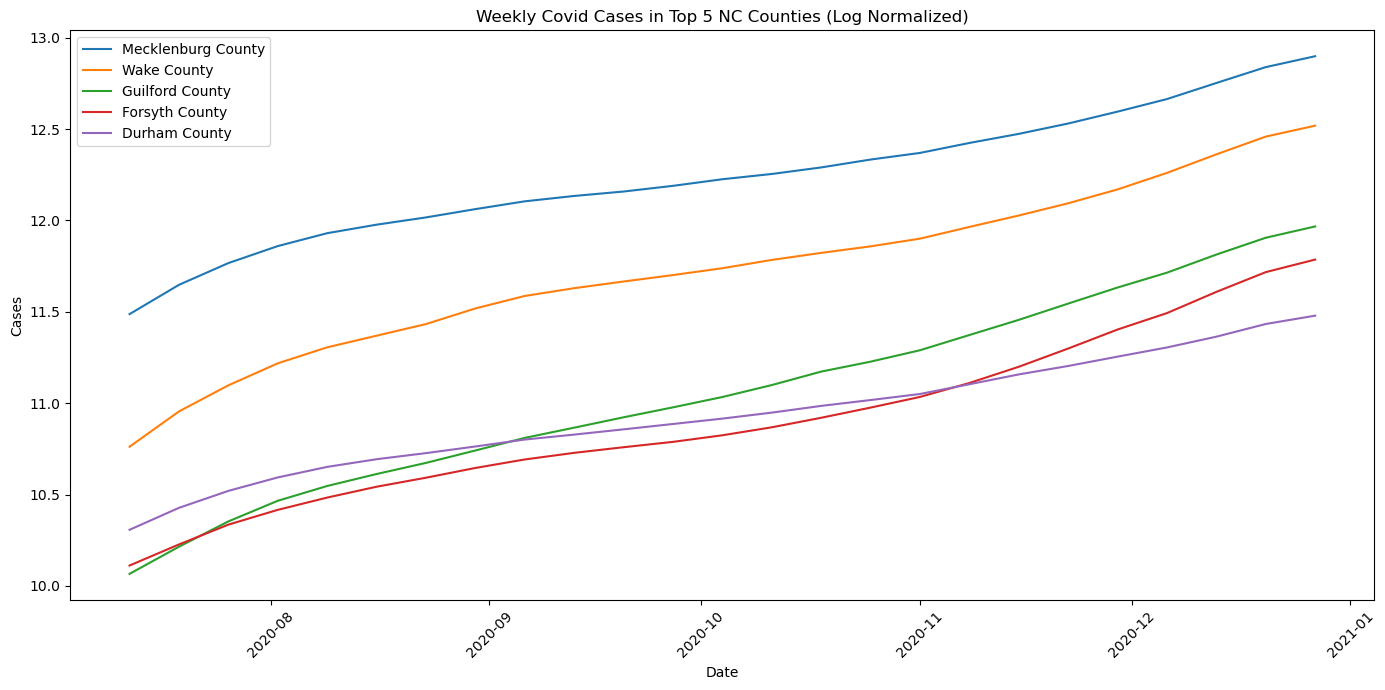

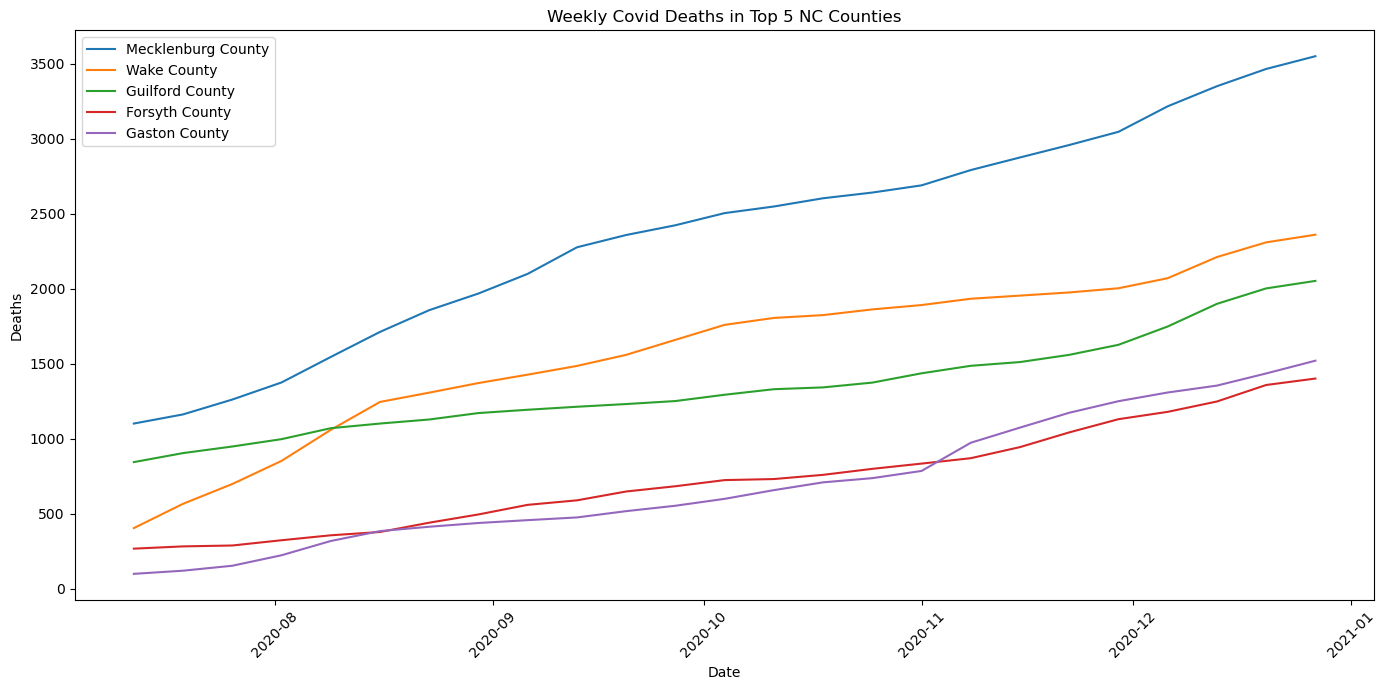

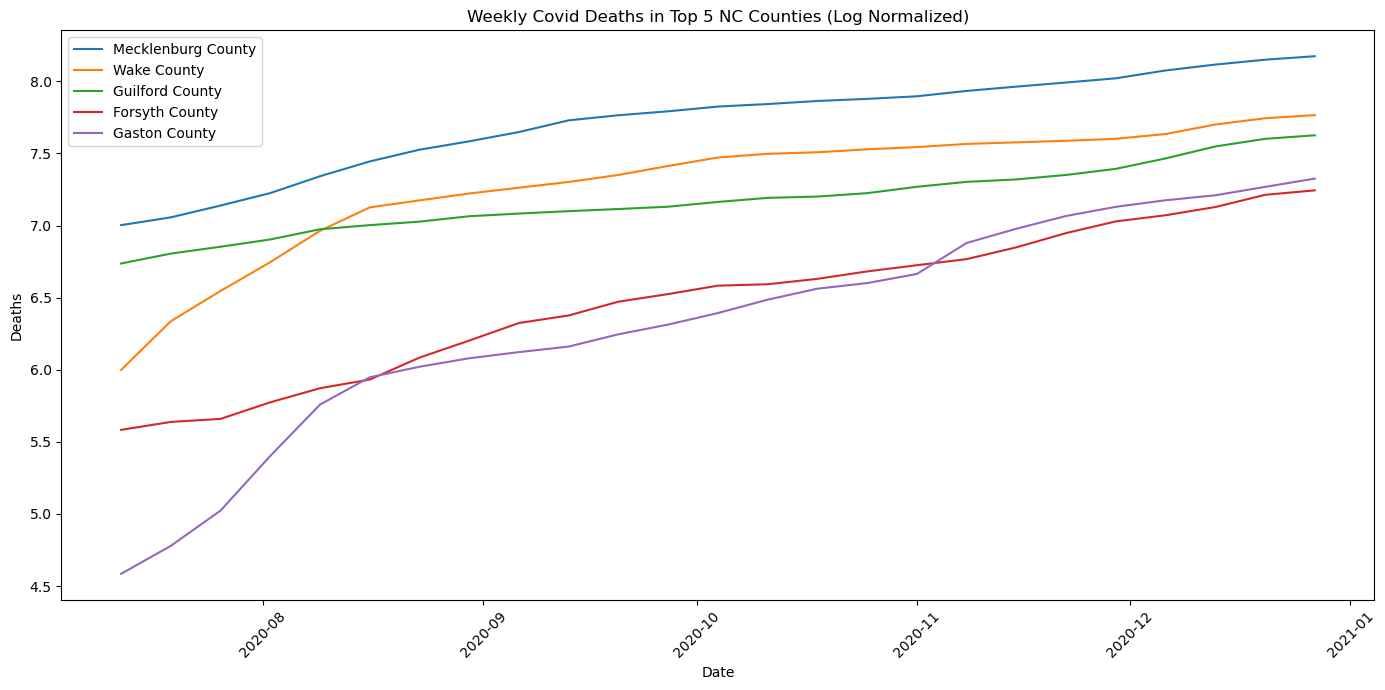

In [11]:
# Calculate weekly deaths or cases with this function
def calculate_weekly_stats_2(data, columns):
    reshaped_data = data.melt(value_vars=columns, var_name='date', value_name='count')
    reshaped_data['date'] = pd.to_datetime(reshaped_data['date'].str[:-2])
    
    weekly_data = reshaped_data.groupby(pd.Grouper(key='date', freq='W'))
    
    weekly_stats = weekly_data.sum()
    
    return weekly_stats

cases_meck = calculate_weekly_stats_2(mecklenburg_df, cases_dates)
cases_wake = calculate_weekly_stats_2(wake_df, cases_dates)
cases_guilford = calculate_weekly_stats_2(guilford_df, cases_dates)
cases_forsyth = calculate_weekly_stats_2(forsyth_df, cases_dates)
cases_durham = calculate_weekly_stats_2(durham_df, cases_dates)

plt.figure(figsize=(14, 7))

# Plot cases
plt.plot(cases_meck.index, cases_meck['count'], label="Mecklenburg County")
plt.plot(cases_wake.index, cases_wake['count'], label="Wake County")
plt.plot(cases_guilford.index, cases_guilford['count'], label="Guilford County")
plt.plot(cases_forsyth.index, cases_forsyth['count'], label="Forsyth County")
plt.plot(cases_durham.index, cases_durham['count'], label="Durham County")

plt.title("Weekly Covid Cases in Top 5 NC Counties")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cases log normalized
plt.figure(figsize=(14, 7))

plt.plot(cases_meck.index, np.log(cases_meck['count']), label="Mecklenburg County")
plt.plot(cases_wake.index, np.log(cases_wake['count']), label="Wake County")
plt.plot(cases_guilford.index, np.log(cases_guilford['count']), label="Guilford County")
plt.plot(cases_forsyth.index, np.log(cases_forsyth['count']), label="Forsyth County")
plt.plot(cases_durham.index, np.log(cases_durham['count']), label="Durham County")

plt.title("Weekly Covid Cases in Top 5 NC Counties (Log Normalized)")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


deaths_meck = calculate_weekly_stats_2(mecklenburg_df, deaths_dates)
deaths_wake = calculate_weekly_stats_2(wake_df, deaths_dates)
deaths_guilford = calculate_weekly_stats_2(guilford_df, deaths_dates)
deaths_forsyth = calculate_weekly_stats_2(forsyth_df, deaths_dates)
deaths_gaston = calculate_weekly_stats_2(gaston_df, deaths_dates)

# Plot deaths

plt.figure(figsize=(14, 7))


plt.plot(deaths_meck.index, deaths_meck['count'], label="Mecklenburg County")
plt.plot(deaths_wake.index, deaths_wake['count'], label="Wake County")
plt.plot(deaths_guilford.index, deaths_guilford['count'], label="Guilford County")
plt.plot(deaths_forsyth.index, deaths_forsyth['count'], label="Forsyth County")
plt.plot(deaths_gaston.index, deaths_gaston['count'], label="Gaston County")

plt.title("Weekly Covid Deaths in Top 5 NC Counties")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Plot deaths log normalized
plt.figure(figsize=(14, 7))


plt.plot(deaths_meck.index, np.log(deaths_meck['count']), label="Mecklenburg County")
plt.plot(deaths_wake.index, np.log(deaths_wake['count']), label="Wake County")
plt.plot(deaths_guilford.index, np.log(deaths_guilford['count']), label="Guilford County")
plt.plot(deaths_forsyth.index, np.log(deaths_forsyth['count']), label="Forsyth County")
plt.plot(deaths_gaston.index, np.log(deaths_gaston['count']), label="Gaston County")

plt.title("Weekly Covid Deaths in Top 5 NC Counties (Log Normalized)")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Both the cases and the deaths for all 5 counties increase as time moves closer to the end of the year. This is most likely due to the holidays and people traveling. These counties growth in cases and deaths followed the same trend as the state as a whole. North Carolina as a whole seemed to increase towards Christmas time.